In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Setting working directiory, train and test path
dir_path = os.getcwd()
train_path = dir_path + '\data\\train.csv'
test_path = dir_path + '\data\\test.csv'

In [6]:
# Reading data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [7]:
# First look to data frame
train_df.head() # 5 first data frame rows
train_df.tail() # 5 last data frame rows
train_df.info() # Columns Information, No-Null Values, data types
test_df.info() # Columns Information, No-Null Values, data types
train_df.describe() # Statistical description for continuous variable
train_df.describe(include = ['O']) # Description for object variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thomas, Master. Assad Alexander",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# Getting a list of categorical variables
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Variables: ", object_cols)

Categorical Variables:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
# Checking Number of Null Entries
missingValuesCountByColumn = [(train_df.isnull().sum()), (test_df.isnull().sum())]
print('Train Set:\n',missingValuesCountByColumn[0][missingValuesCountByColumn[0] > 0])
print('\nTest Set:\n',missingValuesCountByColumn[1][missingValuesCountByColumn[1] > 0])

Train Set:
 Age         177
Cabin       687
Embarked      2
dtype: int64

Test Set:
 Age       86
Fare       1
Cabin    327
dtype: int64


In [14]:
# Ditribution of Survivers by features
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending = False)
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).count()#.sort_values(by='Survived', ascending = False)
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending = False)
train_df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending = False)
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(3.799999999999997, 0.5, 'Density')

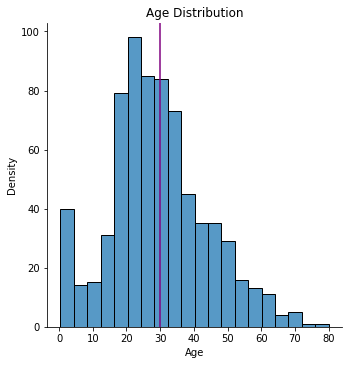

In [16]:
# Plotting
sns.displot(train_df['Age']) # Age Distribution
#sns.displot(test_df['Age']) # Age Distribution

plt.title("Age Distribution") # Chart Title
plt.axvline(x = 30, color = "purple") # Chart Vertical line at x = 30
plt.xlabel('Age') # X Axis Title
plt.ylabel('Density') # Y Axis Title

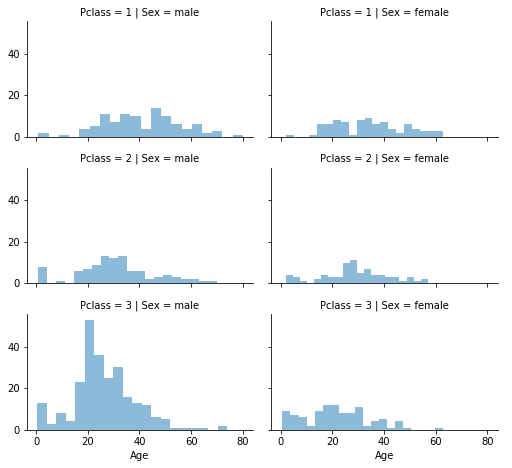

In [13]:
# Studying Age Ditribution over Pclass and Sex
g = sns.FacetGrid(train_df, row = "Pclass", col = "Sex", height = 2.2 ,aspect = 1.6)
g.map(plt.hist, 'Age', alpha = .5, bins = 20) # Plotting histogram
g.add_legend() # Adicionar Legenda (3 variáveis)